# https://www.geeksforgeeks.org/dijkstras-shortest-path-algorithm-greedy-algo-7/

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

random.seed(0)
    
def generate_graph(V, E):
    if E > V*V:
        print("E > V^2")
        return nx.Graph()
    G = nx.empty_graph(V, nx.DiGraph())
    for e in range(1, (E//V)+1):
        for v in range(V):
            G.add_weighted_edges_from([(v, (v+e)%(V), e)])  
    for v in range(0, E%V):
        G.add_weighted_edges_from([(v, (v+(E//V)+1)%(V), (E//V)+1)])
    return G

def generate_random_graph(V, E):
    if E > V*V:
        print("E > V^2")
        return nx.Graph()
    G = nx.empty_graph(V, nx.DiGraph())
    for e in range(1, (E//V)+1):
        for v in range(V):
            G.add_weighted_edges_from([(v, (v+e)%(V), random.randint(1,9))]) 
    for v in range(0, E%V):
        G.add_weighted_edges_from([(v, (v+(E//V)+1)%(V), random.randint(1,9))])
    return G

def mask_random_graph(G,V,E):
    temp = G.copy()
    for e in range((E//V)+2, V+1):
        for v in range(V):
            temp.remove_edge(v, (v+e)%(V))

    for v in range(V-1, E%V-1, -1):
        temp.remove_edge(v, (v+(E//V)+1)%(V))
            
    return temp


In [152]:
V = 10
E = 20
G = generate_random_graph(V, V**2)
temp = mask_random_graph(G, V, E)

'''
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, seed=0)
nx.draw_networkx(G,pos)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()
'''

#print(nx.adjacency_matrix(G).todense())
#G.number_of_edges()

'\nplt.figure(figsize=(10,6))\npos = nx.spring_layout(G, seed=0)\nnx.draw_networkx(G,pos)\nedge_labels = nx.get_edge_attributes(G, "weight")\nnx.draw_networkx_edge_labels(G, pos, edge_labels)\nplt.show()\n'

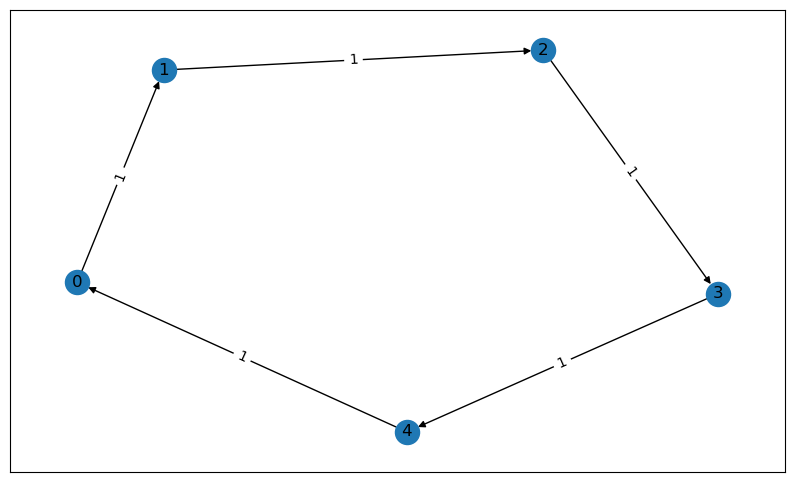

[[0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]]


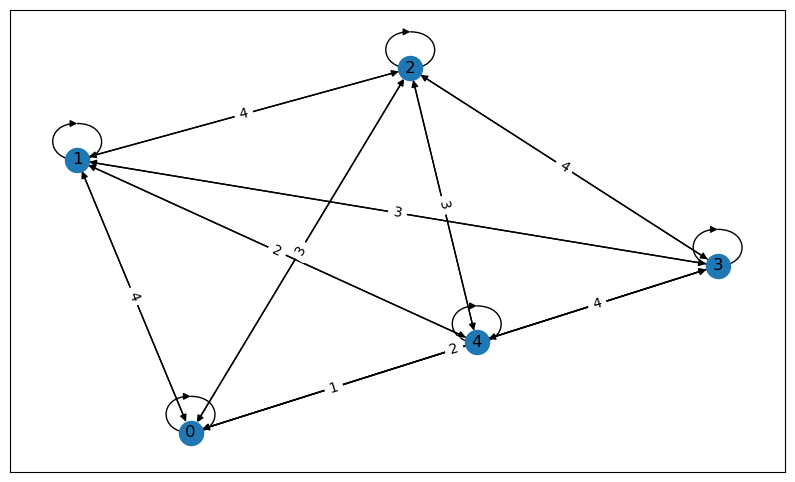

[[5 1 2 3 4]
 [4 5 1 2 3]
 [3 4 5 1 2]
 [2 3 4 5 1]
 [1 2 3 4 5]]


In [146]:
G = generate_graph (5, 5)
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, seed=0)
nx.draw_networkx(G,pos)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()
print(nx.adjacency_matrix(G).todense())

G = generate_graph (5, 5**2)
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, seed=0)
nx.draw_networkx(G,pos)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()
print(nx.adjacency_matrix(G).todense())

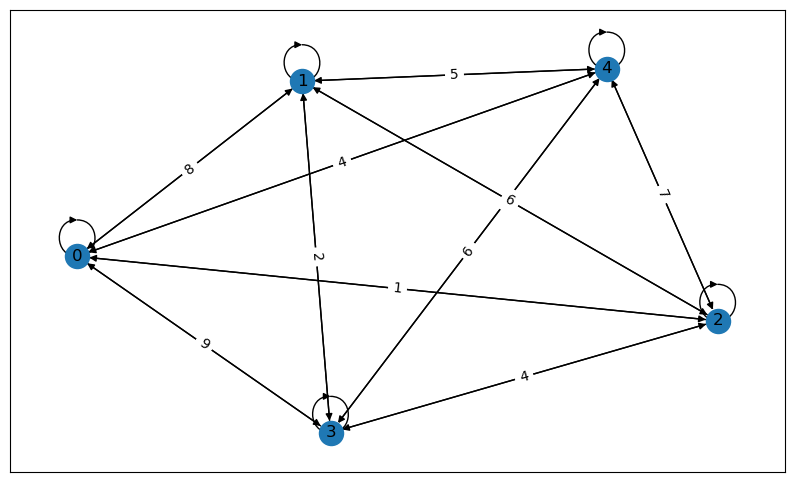

[[2 2 9 1 1]
 [8 4 6 8 9]
 [1 6 4 7 8]
 [9 2 4 4 6]
 [4 5 7 6 3]]


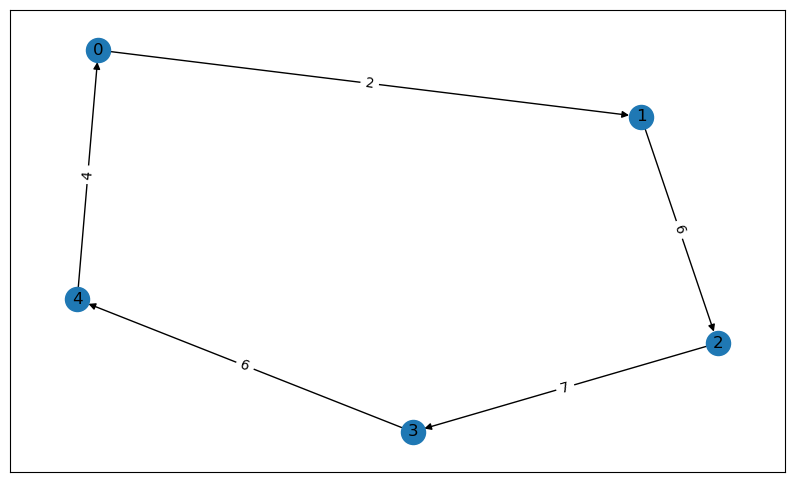

[[0 2 0 0 0]
 [0 0 6 0 0]
 [0 0 0 7 0]
 [0 0 0 0 6]
 [4 0 0 0 0]]


In [150]:
G = generate_random_graph (5, 5**2)
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, seed=0)
nx.draw_networkx(G,pos)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()
print(nx.adjacency_matrix(G).todense())

G = mask_random_graph(G, 5,5)
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, seed=0)
nx.draw_networkx(G,pos)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()
print(nx.adjacency_matrix(G).todense())

(a) Suppose the input graph G = (V, E) is stored in an adjacency matrix and we
use an array for the priority queue. Implement the Dijkstra’s algorithm using this
setting and analyze its time complexity with respect to |V| and |E| both
theoretically and empirically.

In [2]:
import sys
def dijkstra_matrix(G, src):
    adjM = nx.adjacency_matrix(G).todense()
    V = G.number_of_nodes()
    d = [sys.maxsize] * V
    pi = [-1] * V
    S = [0] * V
    KC = 0

    d[src] = 0;
    pi[src] = src;
    # Main Loop --- O(|V|)
    for i in range(V):
        shortest = sys.maxsize
        # Finding shortest distance --- O(|V|)
        for v in range(V):
            KC += 1
            if S[v] == 0 and d[v] < shortest:
                shortest = d[v]
                u = v
                
        S[u] = 1
        # Checking adjancency matrix --- O(|V|)
        for v in range(V):
            KC += 1
            if adjM[u][v] > 0 and S[v] == 0 and d[v] > d[u] + adjM[u][v]:
                # Updating priority queue --- O(1)
                d[v] = d[u] + adjM[u][v]
                pi[v] = u
    return V, d, pi, KC
# Total time complexity = |V| * (|V| + |V|) = 2|V|^2
            
def print_result(V, d, pi, src):
    print("Vertex \tDistance from Source\tPredecessor")
    for v in range(V):
        print(v, "\t\t", d[v], "\t\t", pi[v])
    
    plt.figure(figsize=(10,6))
    SPT = nx.DiGraph()
    for v in range(V):
        if v != src:
            dist = d[v] - d[pi[v]]
            SPT.add_weighted_edges_from([(pi[v], v, dist)])
    pos = nx.spring_layout(SPT, seed=0)
    nx.draw_networkx(SPT,pos)
    edge_labels = nx.get_edge_attributes(SPT, "weight")
    nx.draw_networkx_edge_labels(SPT, pos, edge_labels)
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()
    print(nx.adjacency_matrix(SPT).todense())


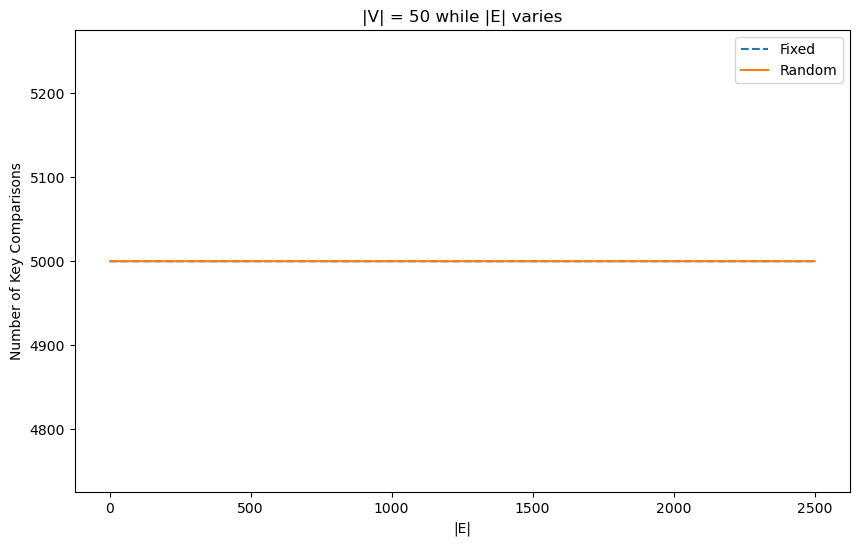

In [156]:
V = 50
EArr = np.arange(1, V**2+1, 1)

plt.figure(figsize=(10,6))

KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_matrix(generate_graph(V, E), 0)
    KCArr.append(KC)
plt.plot(EArr, KCArr, label = "Fixed", linestyle = "--")   

G = generate_random_graph(V, V**2)
KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_matrix(mask_random_graph(G, V, E), 0)
    KCArr.append(KC)
plt.plot(EArr, KCArr, label = "Random") 

plt.xlabel("|E|")
plt.ylabel("Number of Key Comparisons")
plt.title("|V| = {} while |E| varies".format(V))
plt.legend()
plt.show()

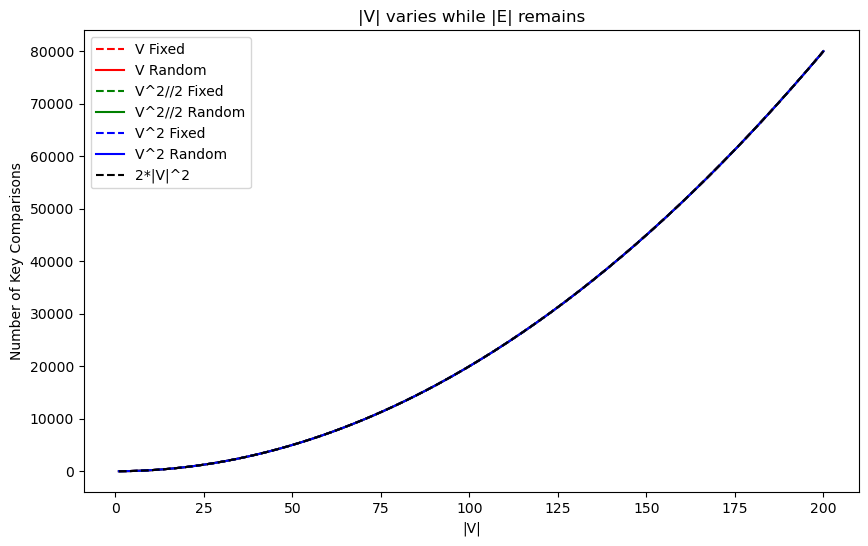

In [161]:
VArr = np.arange(1, 200+1, 1)
plt.figure(figsize=(10,6))

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_matrix(generate_graph(V, V), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V Fixed", color='r', linestyle = "--")   

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_matrix(generate_random_graph(V, V), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V Random", color='r') 

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_matrix(generate_graph(V, V**2//2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V^2//2 Fixed", color='g', linestyle = "--")   

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_matrix(generate_random_graph(V, V**2//2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V^2//2 Random", color='g') 

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_matrix(generate_graph(V, V**2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V^2 Fixed", color='b', linestyle = "--")   

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_matrix(generate_random_graph(V, V**2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V^2 Random", color='b') 


plt.plot(VArr, 2*VArr**2, label = "2*|V|^2", linestyle = "--", color ='k')
plt.xlabel("|V|")
plt.ylabel("Number of Key Comparisons")
plt.title("|V| varies while |E| remains")
plt.legend()
plt.show()

(b) Suppose the input graph G = (V, E) is stored in an array of adjacency lists and
we use a minimizing heap for the priority queue. Implement the Dijkstra’s
algorithm using this setting and analyze its time complexity with respect to |V|
and |E| both theoretically and empirically. 

# https://github.com/python/cpython/blob/3.12/Lib/heapq.py

In [3]:
import heapq

# DIRECTLY FROM THE SOURCE FILE, ADJUSTED TO INCLUDED KEY COMPARISONS#
def heappush(heap, item):
    KC = 0
    """Push item onto heap, maintaining the heap invariant."""
    heap.append(item)
    KC += _siftdown(heap, 0, len(heap)-1)
    return KC

def heappop(heap):
    KC = 0
    """Pop the smallest item off the heap, maintaining the heap invariant."""
    lastelt = heap.pop()    # raises appropriate IndexError if heap is empty
    if heap:
        returnitem = heap[0]
        heap[0] = lastelt
        KC += _siftup(heap, 0)
        return returnitem, KC
    return lastelt, KC

def _siftdown(heap, startpos, pos):
    KC = 0
    newitem = heap[pos]
    # Follow the path to the root, moving parents down until finding a place
    # newitem fits.
    while pos > startpos:
        KC += 1
        parentpos = (pos - 1) >> 1
        parent = heap[parentpos]
        if newitem < parent:
            heap[pos] = parent
            pos = parentpos
            continue
        break
    heap[pos] = newitem
    
    return KC
    
def _siftup(heap, pos):
    KC = 0
    endpos = len(heap)
    startpos = pos
    newitem = heap[pos]
    # Bubble up the smaller child until hitting a leaf.
    childpos = 2*pos + 1    # leftmost child position
    while childpos < endpos:
        KC += 1
        # Set childpos to index of smaller child.
        rightpos = childpos + 1
        if rightpos < endpos and not heap[childpos] < heap[rightpos]:
            childpos = rightpos
        # Move the smaller child up.
        heap[pos] = heap[childpos]
        pos = childpos
        childpos = 2*pos + 1
    # The leaf at pos is empty now.  Put newitem there, and bubble it up
    # to its final resting place (by sifting its parents down).
    heap[pos] = newitem
    KC += _siftdown(heap, startpos, pos)
    
    return KC

In [5]:
def dijkstra_list(G, src):
    adjL = gen_adjL(G)
    V = G.number_of_nodes()
    d = [sys.maxsize] * V
    pi = [-1] * V
    S = [0] * V
    pq = []
    KC = 0

    
    d[src] = 0
    pi[src] = src
    KC += heappush(pq, (d[src], src))
    
    # Main loop --- O(|V|)
    while pq:
        (_ , u), key = heappop(pq) #--- O(log|V|)
        KC += key
        S[u] = 1
        
        # Checking adjancency list --- O(|E|/|V|)
        for v, w in adjL[u]:
            KC += 1
            if S[v] == 0  and d[v] > d[u] + w:
                d[v] = d[u] + w
                pi[v] = u
                KC += heappush(pq, (d[v], v))  #--- O(log|V|)
        # Summed complexity = O(|E|/|V| log |V|)
    return V, d, pi, KC
# Total time complexity = O(|V| * (log|V| + |E|/|V| log |V|)) = O((|V|+|E|)log|V|)
    
def gen_adjL(G):
    V = G.number_of_nodes()
    adjL = [[] for _ in range(V)]
    edgelist = list(nx.to_edgelist(G))
    for entry in edgelist:
        adjL[entry[0]].append((entry[1], entry[2]['weight']))
    return adjL


In [ ]:
V, d, pi, KC = dijkstra_list(G, 0)
print("Number of Key Comparisons:", KC)
#print_result(V, d, pi, 0)

## Fixed weighted graph

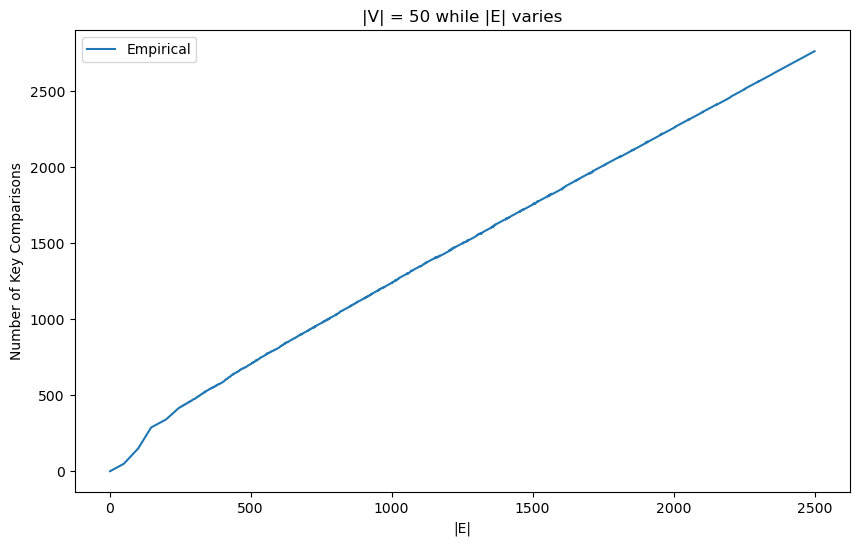

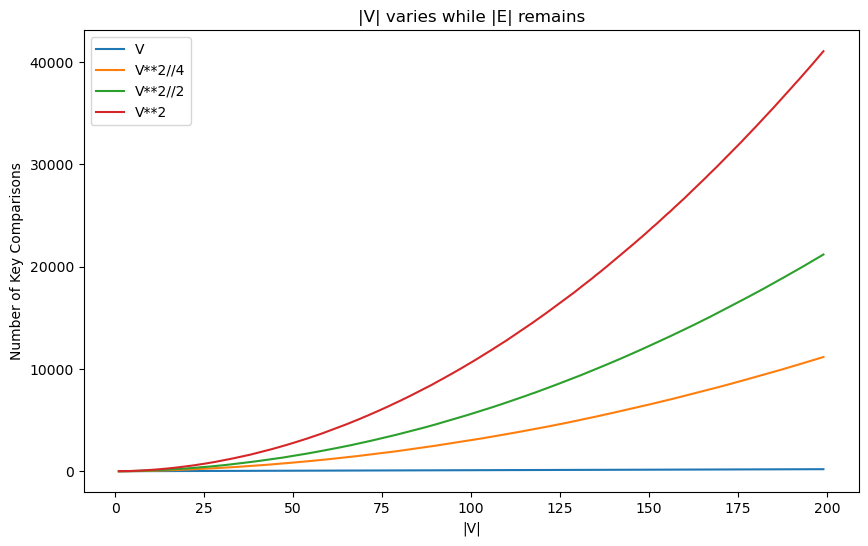

In [8]:
V = 50
EArr = np.arange(1, V**2+1, 1)
KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, E), 0)
    KCArr.append(KC)

plt.figure(figsize=(10,6))
plt.plot(EArr, KCArr, label = "Empirical")
plt.xlabel("|E|")
plt.ylabel("Number of Key Comparisons")
plt.title("|V| = {} while |E| varies".format(V))
plt.legend()
plt.show()

VArr = np.arange(1, 200, 1)
KCArr = []
plt.figure(figsize=(10,6))
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, V), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V")

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, V**2//4), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2//4")

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, V**2//2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2//2")

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, V**2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2")

plt.xlabel("|V|")
plt.ylabel("Number of Key Comparisons")
plt.title("|V| varies while |E| remains")
plt.legend()
plt.show()

## Random weighted graph

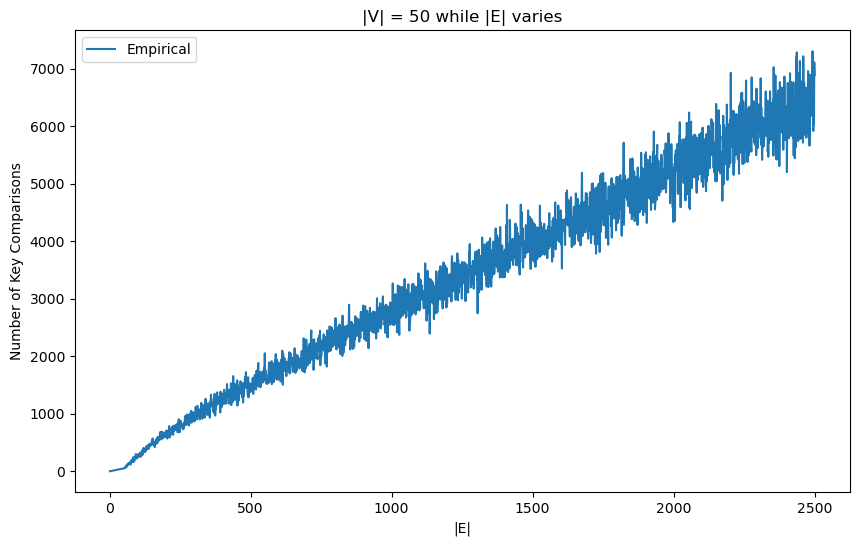

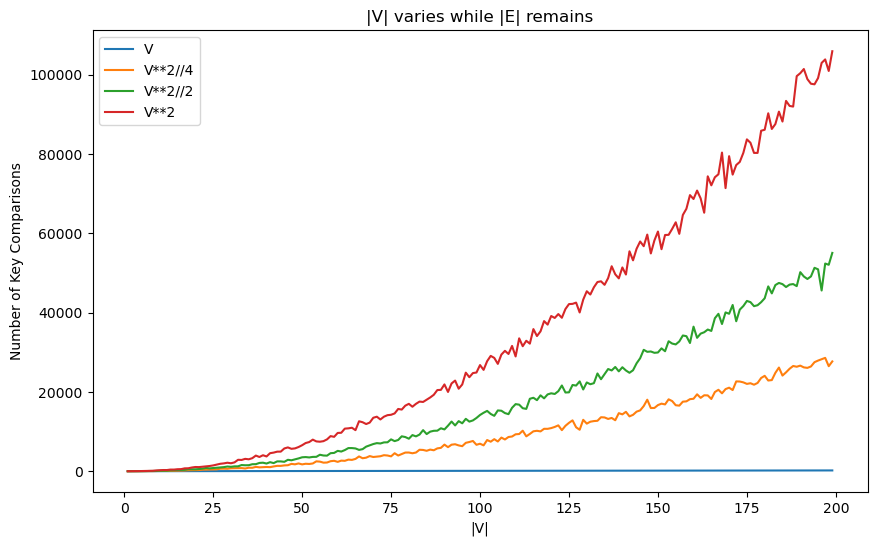

In [9]:
V = 50
EArr = np.arange(1, V**2+1, 1)
KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, E), 0)
    KCArr.append(KC)

plt.figure(figsize=(10,6))
plt.plot(EArr, KCArr, label = "Empirical")
plt.xlabel("|E|")
plt.ylabel("Number of Key Comparisons")
plt.title("|V| = {} while |E| varies".format(V))
plt.legend()
plt.show()

VArr = np.arange(1, 200+1, 1)
KCArr = []
plt.figure(figsize=(10,6))
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, V), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V")

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, V**2//4), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2//4")

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, V**2//2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2//2")

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, V**2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2")

plt.xlabel("|V|")
plt.ylabel("Number of Key Comparisons")
plt.title("|V| varies while |E| remains")
plt.legend()
plt.show()

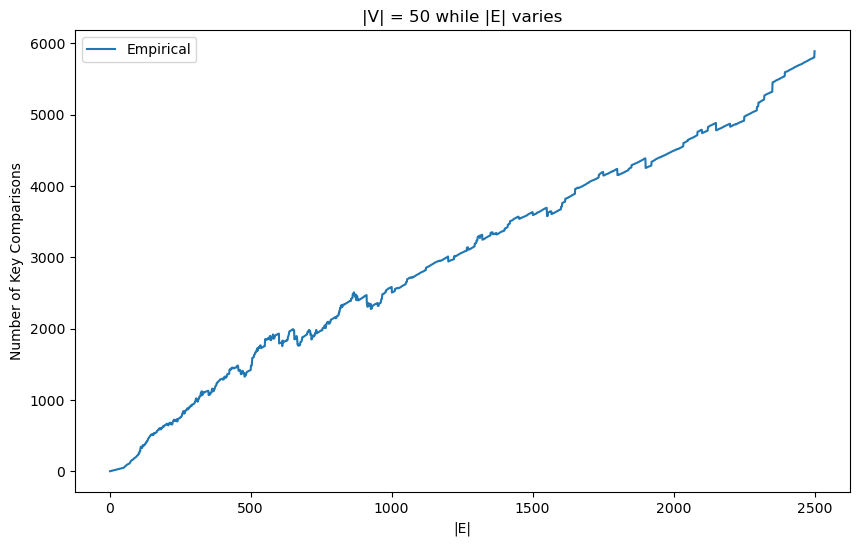

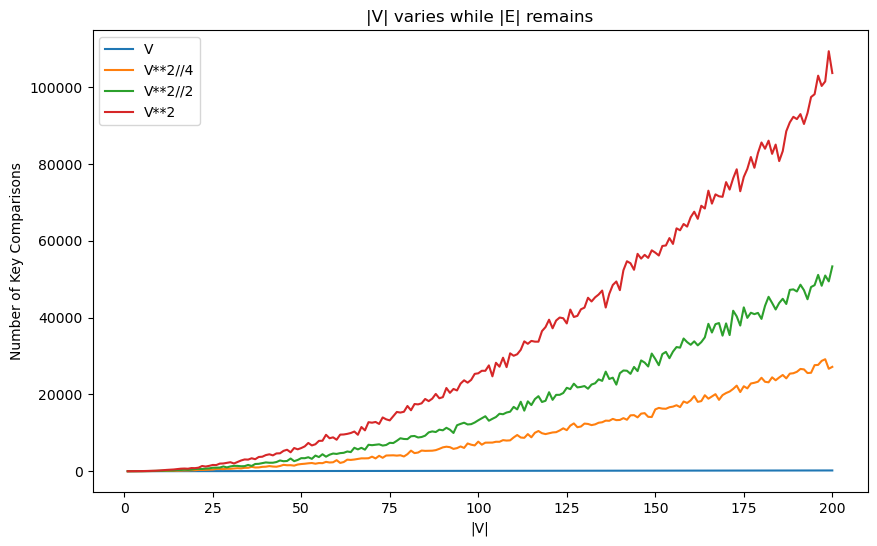

In [165]:
V = 50
G = generate_random_graph(V, V**2)
EArr = np.arange(1, V**2+1, 1)
KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_list(mask_random_graph(G, V, E), 0)
    KCArr.append(KC)

plt.figure(figsize=(10,6))
plt.plot(EArr, KCArr, label = "Empirical")
plt.xlabel("|E|")
plt.ylabel("Number of Key Comparisons")
plt.title("|V| = {} while |E| varies".format(V))
plt.legend()
plt.show()

VArr = np.arange(1, 200+1, 1)
KCArr = []
plt.figure(figsize=(10,6))
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, V), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V")

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, V**2//4), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2//4")

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, V**2//2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2//2")

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, V**2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2")

plt.xlabel("|V|")
plt.ylabel("Number of Key Comparisons")
plt.title("|V| varies while |E| remains")
plt.legend()
plt.show()

## Combined Plots

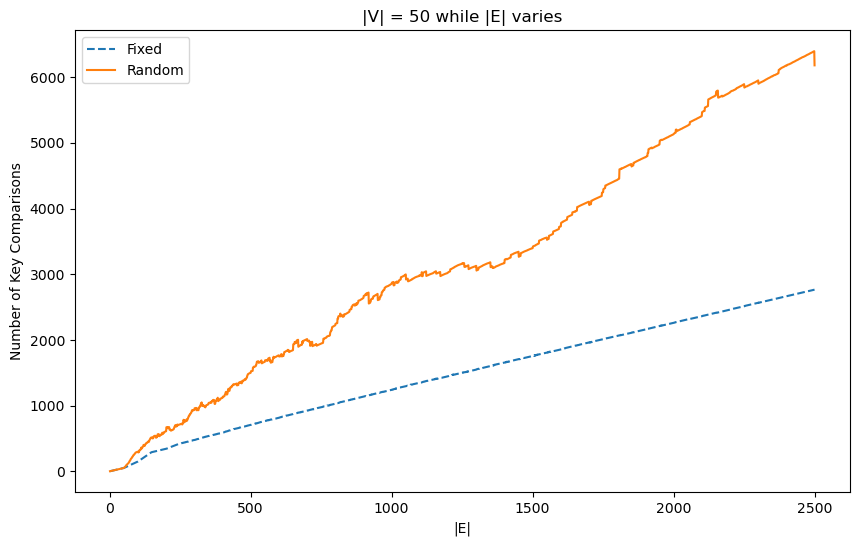

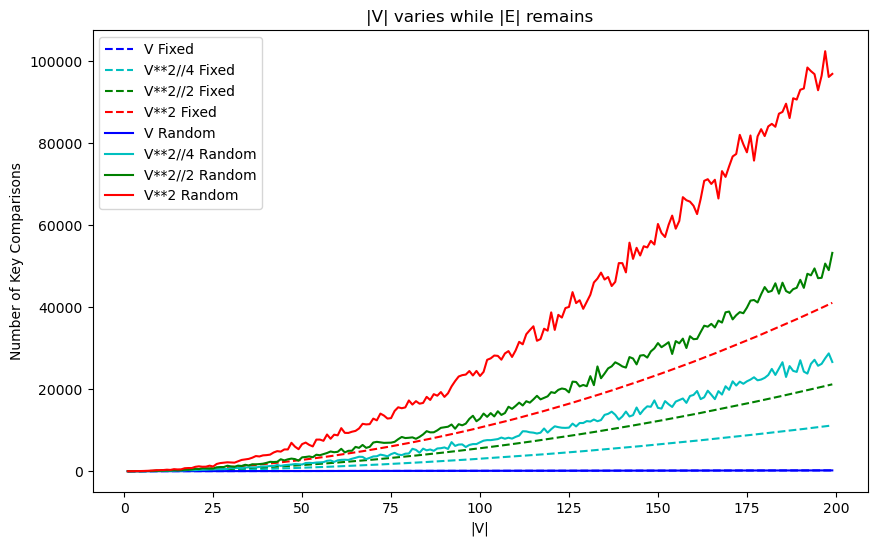

In [170]:
V = 50
EArr = np.arange(1, V**2+1, 1)

plt.figure(figsize=(10,6))

KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, E), 0)
    KCArr.append(KC)
plt.plot(EArr, KCArr, label = "Fixed", linestyle = '--')

G = generate_random_graph(V, V**2)   
KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_list(mask_random_graph(G, V, E), 0)
    KCArr.append(KC)
plt.plot(EArr, KCArr, label = "Random")


plt.xlabel("|E|")
plt.ylabel("Number of Key Comparisons")
plt.title("|V| = {} while |E| varies".format(V))
plt.legend()
plt.show()


VArr = np.arange(1, 200, 1)
KCArr = []
plt.figure(figsize=(10,6))
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, V), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V Fixed", linestyle = '--', color = 'b')

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, V**2//4), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2//4 Fixed", linestyle = '--', color = 'c')

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, V**2//2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2//2 Fixed", linestyle = '--', color = 'g')

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, V**2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2 Fixed", linestyle = '--', color = 'r')

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, V), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V Random", color = 'b')

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, V**2//4), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2//4 Random", color = 'c')

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, V**2//2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2//2 Random", color = 'g')

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, V**2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2 Random", color = 'r')

plt.xlabel("|V|")
plt.ylabel("Number of Key Comparisons")
plt.title("|V| varies while |E| remains")
plt.legend()
plt.show()


In [ ]:
V = 50
EArr = np.arange(1, V**2+1, 1)

plt.figure(figsize=(10,6))

KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, E), 0)
    KCArr.append(KC)
plt.plot(EArr, KCArr, label = "Fixed", linestyle = '--')    
KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, E), 0)
    KCArr.append(KC)
plt.plot(EArr, KCArr, label = "Random")


plt.xlabel("|E|")
plt.ylabel("Number of Key Comparisons")
plt.title("|V| = {} while |E| varies".format(V))
plt.legend()
plt.show()


VArr = np.arange(1, 200, 1)
KCArr = []
plt.figure(figsize=(10,6))
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, V), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V Fixed", linestyle = '--', color = 'b')

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, V**2//4), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2//4 Fixed", linestyle = '--', color = 'c')

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, V**2//2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2//2 Fixed", linestyle = '--', color = 'g')

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, V**2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2 Fixed", linestyle = '--', color = 'r')

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, V), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V Random", color = 'b')

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, V**2//4), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2//4 Random", color = 'c')

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, V**2//2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2//2 Random", color = 'g')

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, V**2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2 Random", color = 'r')

plt.xlabel("|V|")
plt.ylabel("Number of Key Comparisons")
plt.title("|V| varies while |E| remains")
plt.legend()
plt.show()


(c) Compare the two implementations in (a) and (b). Discuss which implementation
is better and in what circumstances. 

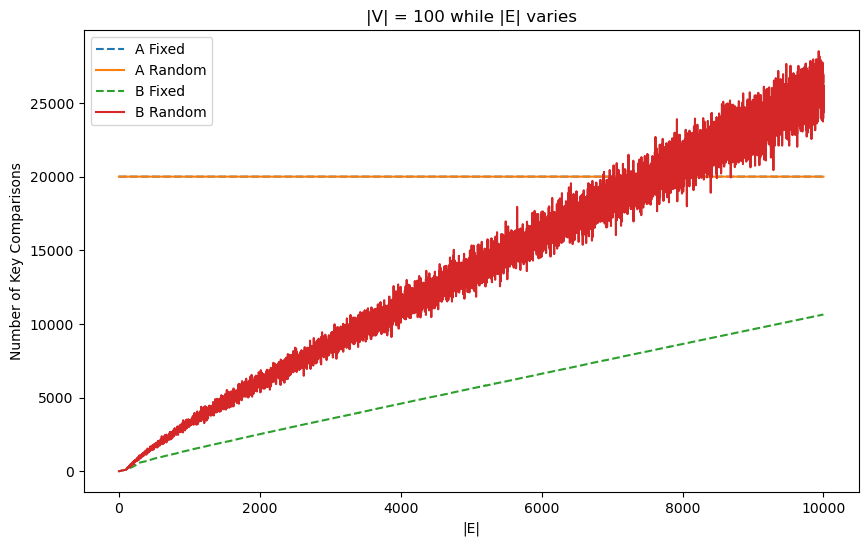

In [24]:
V = 100
EArr = np.arange(1, V**2+1, 1)

plt.figure(figsize=(10,6))

KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_matrix(generate_graph(V, E), 0)
    KCArr.append(KC)
plt.plot(EArr, KCArr, label = "A Fixed", linestyle = "--")   

KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_matrix(generate_random_graph(V, E), 0)
    KCArr.append(KC)
plt.plot(EArr, KCArr, label = "A Random") 

KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, E), 0)
    KCArr.append(KC)
plt.plot(EArr, KCArr, label = "B Fixed", linestyle = '--')    
KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_list(generate_random_graph(V, E), 0)
    KCArr.append(KC)
plt.plot(EArr, KCArr, label = "B Random")


plt.xlabel("|E|")
plt.ylabel("Number of Key Comparisons")
plt.title("|V| = {} while |E| varies".format(V))
plt.legend()
plt.show()

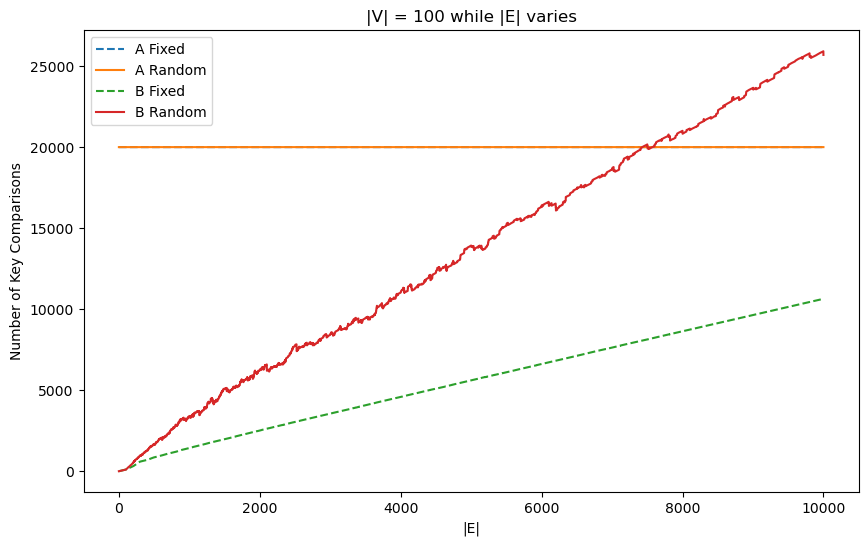

In [169]:
V = 100
G = generate_random_graph(V, V**2)
EArr = np.arange(1, V**2+1, 1)

plt.figure(figsize=(10,6))

KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_matrix(generate_graph(V, E), 0)
    KCArr.append(KC)
plt.plot(EArr, KCArr, label = "A Fixed", linestyle = "--")   

KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_matrix(generate_random_graph(V, E), 0)
    KCArr.append(KC)
plt.plot(EArr, KCArr, label = "A Random") 

KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, E), 0)
    KCArr.append(KC)
plt.plot(EArr, KCArr, label = "B Fixed", linestyle = '--')    
KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_list(mask_random_graph(G, V, E), 0)
    KCArr.append(KC)
plt.plot(EArr, KCArr, label = "B Random")


plt.xlabel("|E|")
plt.ylabel("Number of Key Comparisons")
plt.title("|V| = {} while |E| varies".format(V))
plt.legend()
plt.show()

In [24]:
Vmax = 50
Vstep = 5
trial = 50

VArr = np.arange(Vstep, Vmax+1, Vstep)
XArr = []

for V in VArr:
    EArr = np.arange(V**2//2, V**2+1, 1)
    temp = []
    limit = 2*(V**2)
    KCArr = []
    for i in range(trial):
        G = generate_random_graph(V, V**2)
        for E in EArr:
            _, d, pi, KC = dijkstra_list(mask_random_graph(G, V, E), 0)

            if KC>=limit:
                temp.append(E/(V**2)*100)
                print(E, V**2, E/(V**2)*100)
                break
            if E>=EArr.max():
                temp.append(100)
    XArr.append(temp)

23 25 92.0
19 25 76.0
24 25 96.0
23 25 92.0
24 25 96.0
18 25 72.0
23 25 92.0
19 25 76.0
19 25 76.0
23 25 92.0
17 25 68.0
16 25 64.0
24 25 96.0
24 25 96.0
20 25 80.0
23 25 92.0
19 25 76.0
24 25 96.0
24 25 96.0
81 100 81.0
95 100 95.0
74 100 74.0
84 100 84.0
77 100 77.0
94 100 94.0
69 100 69.0
87 100 87.0
78 100 78.0
87 100 87.0
79 100 79.0
68 100 68.0
81 100 81.0
93 100 93.0
75 100 75.0
59 100 59.0
92 100 92.0
71 100 71.0
74 100 74.0
78 100 78.0
84 100 84.0
85 100 85.0
86 100 86.0
81 100 81.0
94 100 94.0
97 100 97.0
81 100 81.0
89 100 89.0
84 100 84.0
86 100 86.0
74 100 74.0
72 100 72.0
71 100 71.0
84 100 84.0
97 100 97.0
91 100 91.0
79 100 79.0
71 100 71.0
92 100 92.0
72 100 72.0
94 100 94.0
192 225 85.33333333333334
150 225 66.66666666666666
162 225 72.0
171 225 76.0
184 225 81.77777777777779
172 225 76.44444444444444
196 225 87.1111111111111
153 225 68.0
225 225 100.0
197 225 87.55555555555556
180 225 80.0
181 225 80.44444444444444
181 225 80.44444444444444
181 225 80.44444444444444


1795 2500 71.8
2254 2500 90.16
2001 2500 80.04
1851 2500 74.03999999999999
1896 2500 75.84
2031 2500 81.24
2094 2500 83.76
1852 2500 74.08
2275 2500 91.0
2052 2500 82.08
1909 2500 76.36
2084 2500 83.36
2016 2500 80.64
1801 2500 72.04
1946 2500 77.84
2103 2500 84.11999999999999
1906 2500 76.24
2050 2500 82.0
1900 2500 76.0
1778 2500 71.12
2104 2500 84.16
1885 2500 75.4
2050 2500 82.0
2060 2500 82.39999999999999
2461 2500 98.44000000000001
1901 2500 76.03999999999999
1951 2500 78.03999999999999
1958 2500 78.32000000000001
2014 2500 80.56
1951 2500 78.03999999999999
2001 2500 80.04
2107 2500 84.28
2072 2500 82.88
1952 2500 78.08
1928 2500 77.12
2017 2500 80.67999999999999
1965 2500 78.60000000000001
2084 2500 83.36
1711 2500 68.44
2026 2500 81.04
2073 2500 82.92
1828 2500 73.11999999999999
2051 2500 82.04
1770 2500 70.8
1746 2500 69.84
2101 2500 84.04
1967 2500 78.68
1885 2500 75.4
1935 2500 77.4
1748 2500 69.92


50
50
50
50
50
50
50
50
50
50
['5', '10', '15', '20', '25', '30', '35', '40', '45', '50']


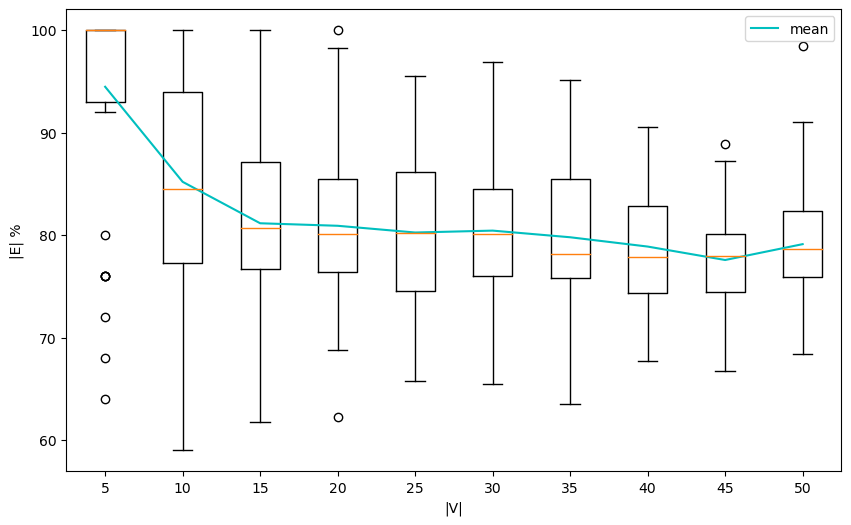

81.77929538044847


In [78]:
for entries in XArr:
    print(len(entries))
    
labels = []
for entries in VArr:
    labels.append(str(entries))
print(labels)

plt.figure(figsize=(10,6))
plt.boxplot(XArr, labels = labels)


test = []
for entries in XArr:
    test.append(np.average(entries))
plt.plot(np.arange(1,11),test, color = 'c', linewidth = 1.5, label = "mean")

plt.xlabel("|V|")
plt.ylabel("|E| %")
plt.legend()
plt.show()

print(np.average(test))